<a href="https://colab.research.google.com/github/niteen11/lagcc_data_analytics_micro_credential/blob/master/Unit%203%20-%20Python%20Advanced/Assignments/Unit3_Python_Advanced_Pandas_DataWrangling_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 : Python Data Analysis using salaries dataset

# Data Exploration:  This should include summary statistics, means, medians, quartiles, or any other relevant information about the data set. 

In [68]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Salaries.csv')

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
# 397 rows = 397 employees
df.shape

(397, 7)

In [5]:
df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [6]:
df.tail()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329
396,397,AsstProf,A,8,4,Male,81035


In [7]:
df.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


# Mean/median of all salaries

In [8]:
# Mean of all salaries
salaries=df['salary']
salaries.mean()

113706.45843828715

In [9]:
# Median of all salaries
salaries.median()

107300.0

# Median salary between gender and/or rank(title) Etc...


Making a new Data Frame that only has the columns 'sex' and 'salary'

In [10]:
new_df=df[['sex', 'salary']]
new_df

,sex,salary
0,Male,139750
1,Male,173200
2,Male,79750
3,Male,115000
4,Male,141500
...,...,...
392,Male,103106
393,Male,150564
394,Male,101738
395,Male,95329


Finding the Median salary for all males

In [11]:
# Since there are two questions regarding male and femal median salary
# It will be nice to create a function that handles these two cases

# using 3 arguments, sex for holding male or female
# type for going with median or mean
# data, by default we are dealing with new_df
def get_medianOrmean(sex,type, data=new_df):
    # making condition
    w=new_df['sex']==sex

    # creating a dataframe used condition above
    filter_data=new_df[w]

    # checking type:
    if type=='median':
        # finding the median based on salary column
        meadian_salary=filter_data['salary'].median()
        #printing out the result
        return meadian_salary
    elif type=='mean':
         # finding the median based on salary column
        mean_salary=filter_data['salary'].mean()
        #printing out the result
        return mean_salary

In [12]:
# using the function - get_median -  for male
male_median_salary=get_medianOrmean('Male',"median")
male_median_salary

108043.0

Finding the Median salary for all females

In [13]:
# using the function - get_median -  for femal
Female_median_salary=get_medianOrmean('Female',"median")
Female_median_salary

103750.0

Comparing the Mean salary of Males and Females

In [14]:
# The difference between mean salaries of male and female
median_maleVSfemale=get_medianOrmean('Female',"mean")<get_medianOrmean('Male','mean')
if median_maleVSfemale:
    print('It seems that the average salary for male is more than the average salary for female')
else:
    print('It seems that the average for female is more than the average salary for male')

It seems that the average salary for male is more than the average salary for female


# Data Wrangling – perform some basic transformations on the data

People who have 20 years of experience (Total: 157), (Mean Salary: 122,520.66)

In [15]:
df.head(3)

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750


In [16]:
# people who have exactly 20 years of years in services
year_20=df['yrs.service']==20
new_df1=df[year_20]
print(new_df1.shape[0])
new_df1['salary'].mean()

10


128647.3

Comparing the salaries of people who have 20+ years of experience vs less than 20 years of experience

In [17]:
# getting the number and the mean for people who have more than equal to 20 years
yearMoreThan20=df['yrs.service']>=20
new_df2=df[yearMoreThan20]
print(new_df.shape[0])
new_df2['salary'].mean()

397


122520.65605095541

In [18]:
# getting the number and the mean for people who have less than 20 years
yearLessThan20=df['yrs.service']<20
new_df3=df[yearLessThan20]
print(new_df3.shape[0])
new_df3['salary'].mean()

240


107940.50416666667

In [19]:
# The difference between mean salaries of people with (>=20 and < 20) years experince 
mean_diff=new_df3['salary'].mean()<new_df2['salary'].mean()
if mean_diff:
    print('It seems that the average salary for people with less than 20 years is less than whom their experience more than or equall to 20 years')
else:
    print('It seems that the average salary for people with less than 20 years is more than whom their experience more than or equall to 20 years')

It seems that the average salary for people with less than 20 years is less than whom their experience more than or equall to 20 years


People who have salary of greater than or equal to 200,000

In [21]:
salaryGreaterThan_equal_200k=df['salary']>=200000
new_df4=df[salaryGreaterThan_equal_200k]

new_df4

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
43,44,Prof,B,38,38,Male,231545
249,250,Prof,A,29,7,Male,204000
364,365,Prof,A,43,43,Male,205500


Your Findings here...


# Rename values, subset columns, etc

In [22]:
df.head(5)

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [24]:
# dropping 'Unnamed:0" from dataframe
df.drop('Unnamed: 0',axis=1,  inplace=True)
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [27]:
#checking data type of df
df.dtypes

rank               object
discipline         object
yrs.since.phd       int64
yrs.service         int64
sex              category
salary              int64
dtype: object

In [58]:
# chaning sex, discipline and rank to categorical data
df["sex"] = pd.Categorical(df["sex"], ordered=False)
df["discipline"] = pd.Categorical(df["discipline"], ordered=False)
df["rank"] = pd.Categorical(df["rank"], ordered=False)
df.dtypes

rank               category
discipline         category
yrs.since.phd         int64
experince_years       int64
sex                category
salary                int64
dtype: object

In [31]:
# renaming the column yrs.service by saying the experince_years
df.rename(
    columns = {
      "yrs.service": "experince_years",
    },
    inplace=True
)

# check the name of columns
df.columns


In [34]:
df.describe()

,yrs.since.phd,experince_years,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [40]:
df.isnull().sum()

rank               0
discipline         0
yrs.since.phd      0
experince_years    0
sex                0
salary             0
dtype: int64

In [41]:
df.duplicated().sum()

4

In [61]:
duplicate = df[df.duplicated()]
duplicate

,rank,discipline,yrs.since.phd,experince_years,sex,salary
151,AsstProf,B,4,4,Male,92000
163,AsstProf,B,3,3,Male,89942
197,AsstProf,B,4,4,Male,92000
200,AsstProf,B,4,4,Male,92700


# Create some simple visualizations showing some simple statistics

In [52]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'experince_years', 'sex',
       'salary'],
      dtype='object')

<AxesSubplot:xlabel='sex', ylabel='salary'>

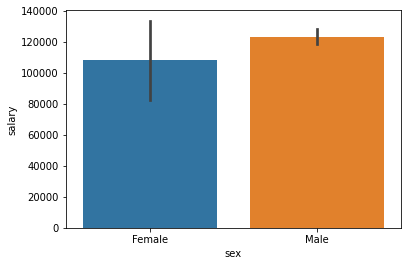

In [76]:
# Want to visualize data that contains male and femal, salary, experince>20 years

data_1=df[df['experince_years']>=20]
sns.barplot(x='sex', y='salary', data=data_1)


-  We can infer that in general and based on data we were provided with it seems that male salary exceed femal salary when their experinces more than or equall to 20 year

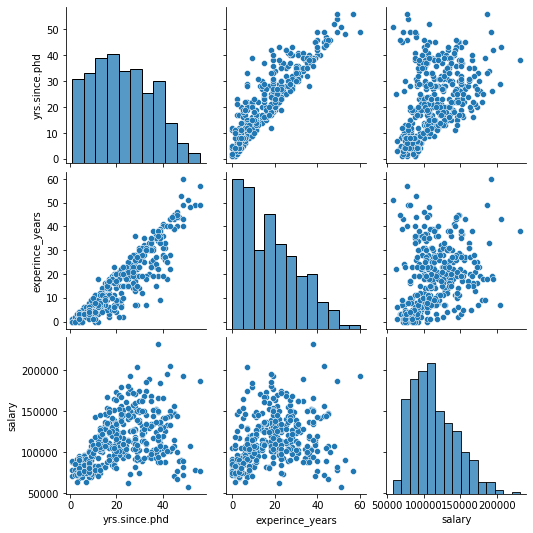

In [78]:
sns.pairplot(df) 

- There are some positive relatioship betweeb salary and experince_years, yrs.since.phd, we will investigate this more furhter 

Your observations from the visuals: 

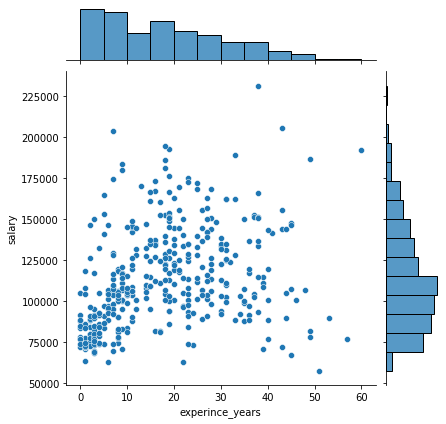

In [80]:
sns.jointplot(x="experince_years", y='salary', data=df)

- It seems that the more experince you have the high salary will get

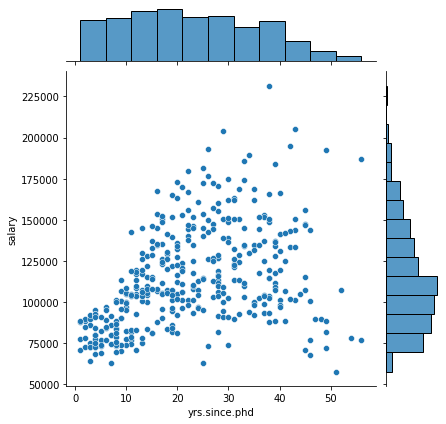

In [81]:
sns.jointplot(x="yrs.since.phd", y='salary', data=df)

It is the same here when it comes to check the number of yer.since.phd and salary, it seems that the high degree you have the high salary will get